In [39]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [40]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

x1=np.asarray(np.random.uniform(0,1,100000))
x2=np.asarray(np.random.uniform(0,1,100000))

X = []
Y = []

for j in range(0,1000):
    if(x2[j]**2+x1[j]**2 <= 1):
        Y.append( [1])
    else:
        Y.append( [0])
    X.append([x1[j],x2[j]])

X=np.asarray(X)
Y=np.asarray(Y)


Declaracion de Variables

In [41]:
input_size = 2
output_layer_size = 1
middle_size = 2

#input and output
x = tf.placeholder(tf.float32,[None, input_size])
#y es la prediccion de y_
#y_ son los datos de y
y_ = tf.placeholder(tf.float32,[None, output_layer_size])

##cambios
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1") #puede ser error


W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3")

In [42]:
tf.Print(W_layer1)

TypeError: Print() takes at least 2 arguments (1 given)

In [43]:
hidden1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
#hidden1 = tf.nn.sigmoid(tf.matmul(input1,W_layer2)+b_layer2) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(hidden1,W_layer3)+b_layer3) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)



In [44]:
init = tf.global_variables_initializer()
sess = tf.Session() # tipo de sesion, puede ser interactiva

In [45]:
sess.run(init) 

Ws = []

for i in range (100000):
    sess.run(train_step, feed_dict = {x: X, y_: Y})
    if(i%1000==0):
        w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
        w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
        w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]
        Ws.append([w1,w2,w3])
    



In [46]:
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer2, feed_dict={x: X, y_: Y}))

[[ 0.99999976]]
[[-0.35248733 -0.79015827]
 [-0.70341492  0.68212843]]


In [47]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.994


In [48]:
w1=[sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})]
w2=[sess.run(b_layer2, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer2, feed_dict={x: X, y_: Y})]
w3=[sess.run(b_layer3, feed_dict={x: X, y_: Y})[0]]+[i[0] for i in sess.run(W_layer3, feed_dict={x: X, y_: Y})]

In [49]:
print w1
print w2
print w3



[20.877769, -22.045132, -6.8380141]
[0.0, -0.35248733, -0.70341492]
[-4.6139374, 46.30003, -48.949982]


In [50]:
sess.close()

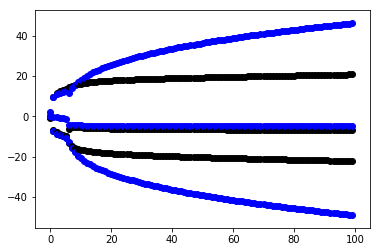

In [56]:


for i in range(0,len(Ws)):
    #x_err = arr[i][0]
    #y_err = arr[i][1]
    plt.scatter(i,Ws[i][0][0],  color='black')
    plt.scatter(i,Ws[i][0][1],  color='black')
    plt.scatter(i,Ws[i][0][2],  color='black')
    #plt.scatter(i,Ws[i][1][0],  color='red')
    #plt.scatter(i,Ws[i][1][1],   color='red')
    #plt.scatter(i,Ws[i][1][2],   color='red')
    plt.scatter(i,Ws[i][2][0],   color='blue')
    plt.scatter(i,Ws[i][2][1],   color='blue')
    plt.scatter(i,Ws[i][2][2],   color='blue')
    



plt.show()
